In [3]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re
import math

Get nPVs Values

In [2]:
# General list to hold nPVs data

def extract_nPVs_stats(file_pattern, tree_name, output_list):
    """
    Extracts mean and stddev of nPVs from ROOT files matching the pattern.

    Args:
        file_pattern (str): Glob pattern for ROOT file paths.
        tree_name (str): Name of the TTree inside the ROOT file.
        output_list (list): List to append tuples in the format (fill_number, mean, stddev).
    """
    for filepath in sorted(glob.glob(file_pattern)):
        # Extract fill number from filename
        match = re.search(r'F(\d+)', os.path.basename(filepath))
        if not match:
            continue
        fill_number = int(match.group(1))

        # Open ROOT file and get tree
        file = r.TFile.Open(filepath)
        tree = file.Get(tree_name)
        if not tree:
            print(f"Warning: No tree named '{tree_name}' in {filepath}")
            continue

        # Fill histogram and compute stats
        hist = r.TH1F("h_nPVs", "", 100, 0, 100)
        tree.Draw("nPVs >> h_nPVs", "", "goff")

        mean = hist.GetMean()
        stddev = hist.GetStdDev()

        output_list.append((fill_number, round(mean, 2), round(stddev, 2)))
        file.Close()

In [37]:
nPVs_data_b2oc_B5 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024_B2OC_UP_B5_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B5
)

# # Print result
# for entry in nPVs_data_b2oc_B5:
#     print(entry)


In [36]:
nPVs_data_b2cc_B5 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024_B2CC_UP_B5_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B5)

In [40]:
# Example: replace these with your full data


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B5}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B5}

# Final list of ratios with uncertainties
nPVs_data_B5 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B5.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B5:
#     print(f"    {entry},")
# print("]")

Fitting B5

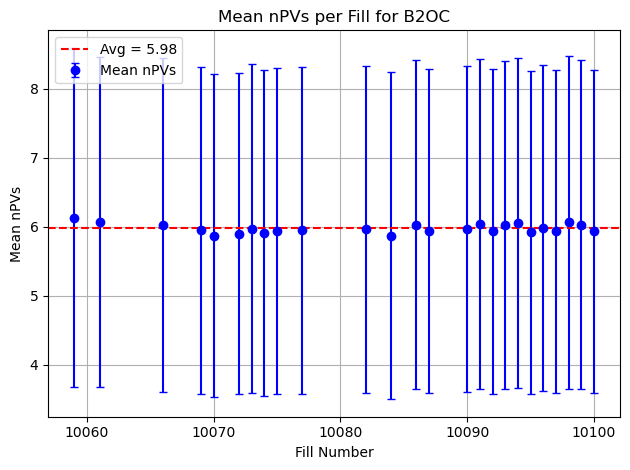

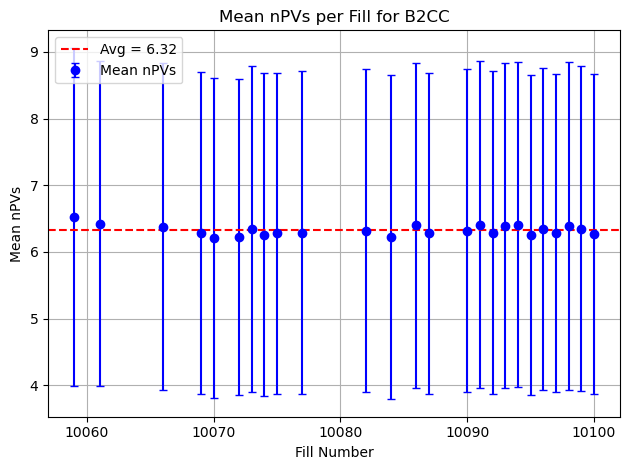

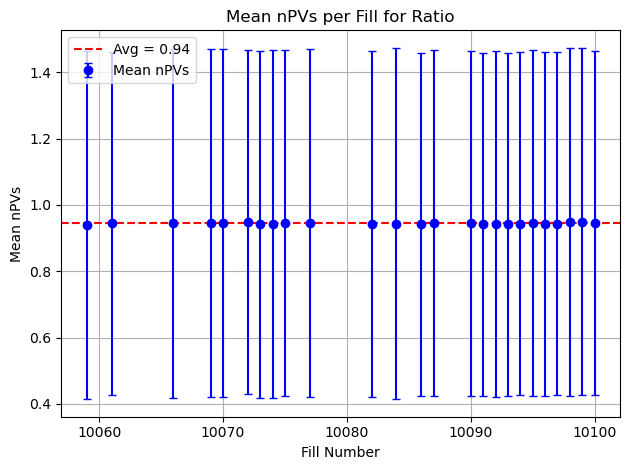

In [41]:
for nPVs_datas in [nPVs_data_b2oc_B5, nPVs_data_b2cc_B5, nPVs_data_B5]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B5 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B5 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Fitting B6

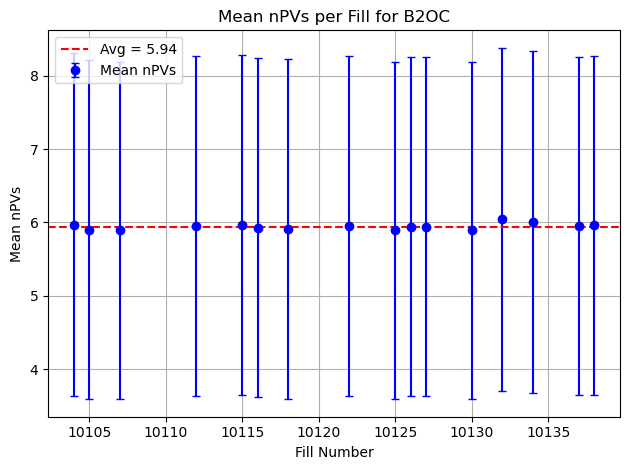

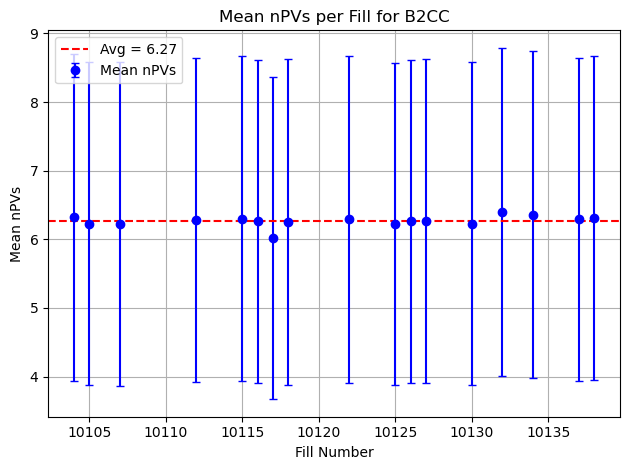

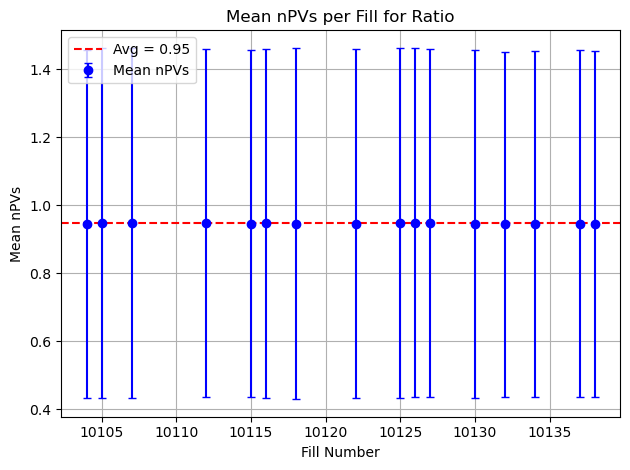

In [9]:
nPVs_data_b2oc_B6 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2OC/NEW B2OC/2024_B2OC_DOWN_B6_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B6
)

# # Print result
# for entry in nPVs_data_b2oc_B6:
#     print(entry)

nPVs_data_b2cc_B6 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2CC/B6/2024_B2CC_DOWN_B6_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B6
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B6}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B6}

# Final list of ratios with uncertainties
nPVs_data_B6 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B6.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B6:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B6, nPVs_data_b2cc_B6, nPVs_data_B6]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B6 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B6 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


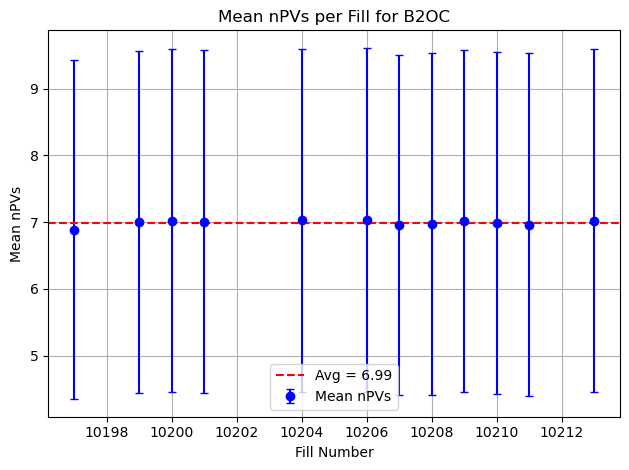

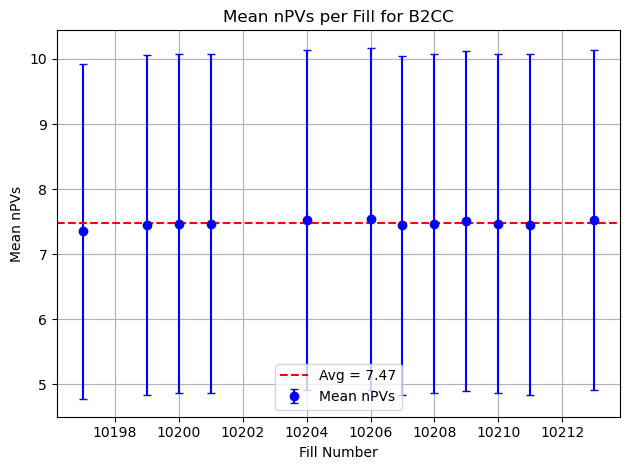

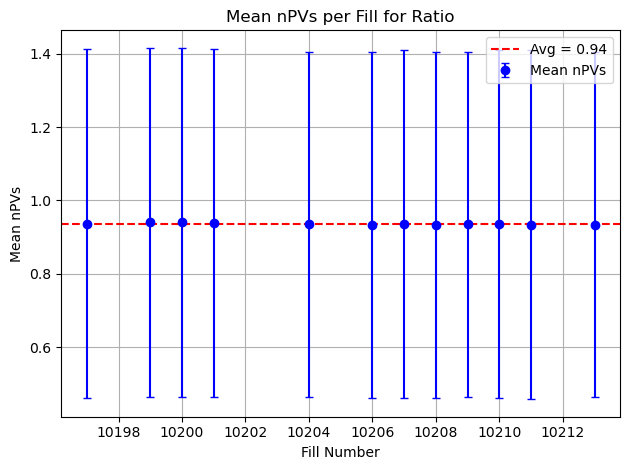

In [11]:
nPVs_data_b2oc_B7 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2OC/NEW B2OC/2024_B2OC_DOWN_B7_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B7
)

# # Print result
# for entry in nPVs_data_b2oc_B7:
#     print(entry)

nPVs_data_b2cc_B7 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2CC/B7/2024_B2CC_DOWN_B7_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B7
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B7}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B7}

# Final list of ratios with uncertainties
nPVs_data_B7 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B7.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B7:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B7, nPVs_data_b2cc_B7, nPVs_data_B7]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B7 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B7 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


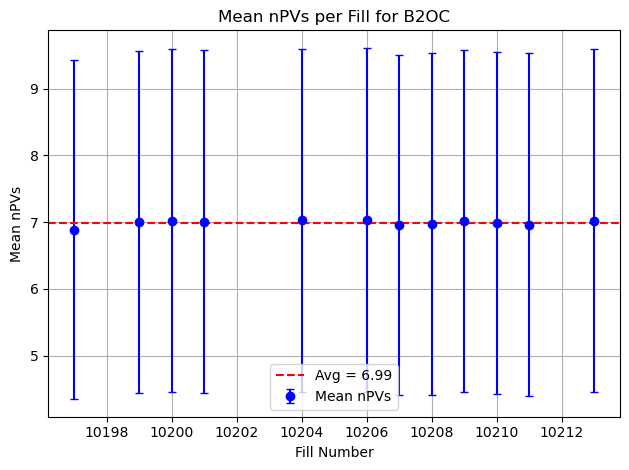

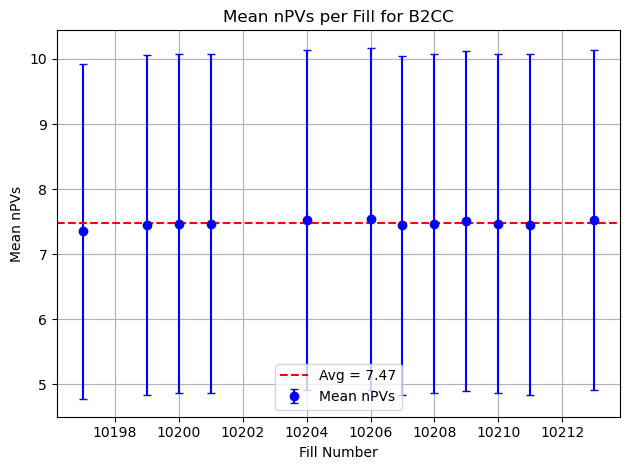

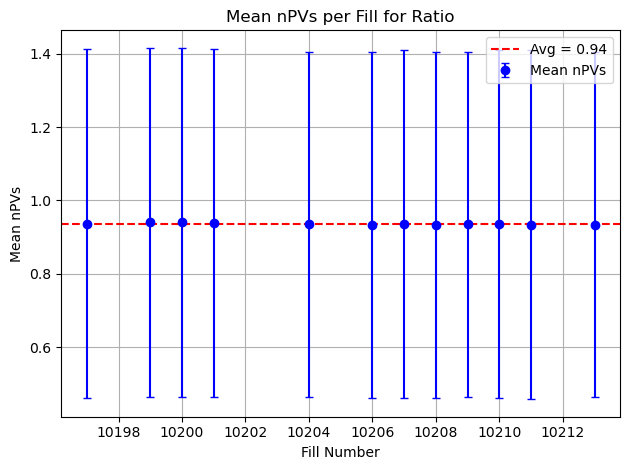

In [13]:
nPVs_data_b2oc_B8 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2OC/NEW B2OC/2024_B2OC_DOWN_B7_F10*.root',
    tree_name='ST-b2oc',
    output_list=nPVs_data_b2oc_B8
)

# # Print result
# for entry in nPVs_data_b2oc_B8:
#     print(entry)

nPVs_data_b2cc_B8 = []
extract_nPVs_stats(
    file_pattern='/Users/ary/Desktop/Ramon Data/Fitted_Data_Clean_Bp_P/2024/Real/B2CC/B7/2024_B2CC_DOWN_B7_F10*.root',
    tree_name='ST-b2cc',
    output_list=nPVs_data_b2cc_B8
)


# Make dictionaries for easier lookup
b2oc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2oc_B8}
b2cc_dict = {fill: (mean, std) for fill, mean, std in nPVs_data_b2cc_B8}

# Final list of ratios with uncertainties
nPVs_data_B8 = []

for fill in sorted(b2oc_dict):
    if fill in b2cc_dict:
        A, sigma_A = b2oc_dict[fill]
        B, sigma_B = b2cc_dict[fill]

        if B == 0:
            print(f"Warning: Skipping fill {fill} due to zero denominator.")
            continue

        R = A / B
        sigma_R = R * math.sqrt((sigma_A / A)**2 + (sigma_B / B)**2)

        nPVs_data_B8.append((fill, round(R, 3), round(sigma_R, 3)))

# # Print result
# print("nPVs_data = [")
# for entry in nPVs_data_B8:
#     print(f"    {entry},")
# print("]")

for nPVs_datas in [nPVs_data_b2oc_B8, nPVs_data_b2cc_B8, nPVs_data_B8]:
    # Separate into x (fill), y (mean), and yerr (stddev)
    fills = [entry[0] for entry in nPVs_datas]
    means = [entry[1] for entry in nPVs_datas]
    errors = [entry[2] for entry in nPVs_datas]

    # Compute average (zero-order fit)
    mean_average = np.mean(means)

    # Plot with error bars
    plt.errorbar(fills, means, yerr=errors, fmt='o', capsize=3, color='blue', label='Mean nPVs')
    plt.axhline(mean_average, color='red', linestyle='--', label=f'Avg = {mean_average:.2f}')

    # Labels and layout
    plt.xlabel("Fill Number")
    plt.ylabel("Mean nPVs")
    plt.title(f"Mean nPVs per Fill for {'B2OC' if nPVs_datas == nPVs_data_b2oc_B8 else 'B2CC' if nPVs_datas == nPVs_data_b2cc_B8 else 'Ratio'}")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
